<a href="https://colab.research.google.com/github/venugopals002/Venus/blob/main/PAN_CARD_OCR_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Install Tesseract OCR
!apt-get install tesseract-ocr

# Install pytesseract
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 3s (1,615 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 121918 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [6]:
!pip install colorama

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
#Tesseract Library
import pytesseract

import cv2
import matplotlib.pyplot as plt
from PIL import Image
import os

### Make prettier the prints ###
from colorama import Fore, Style
c_ = Fore.CYAN
m_ = Fore.MAGENTA
r_ = Fore.RED
b_ = Fore.BLUE
y_ = Fore.YELLOW
g_ = Fore.GREEN
w_ = Fore.WHITE

import warnings
warnings.filterwarnings(action='ignore')

In [12]:
def ExtractDetails(image_path):
    text = pytesseract.image_to_string(Image.open(image_path), lang = 'eng')
    text = text.replace("\n", " ")
    text = text.replace("  ", " ")
    regex_DOB = re.compile('\d{2}[-/]\d{2}[-/]\d{4}')
    regex_num = re.compile('[A-Z]{5}[0-9]{4}[A-Z]{1}')

    image = cv2.imread(os.path.join(image_path))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.axis("off")

    if len(regex_num.findall(text)) == 0:
        print(f'{y_}Blurry Image for tesseract. Input new clear image for viewing pan card number !!!')
        print(Style.RESET_ALL)
    else:
        print("Pan Card Number : ", regex_num.findall(text)[0])

    print('=================================')

    if len(regex_DOB.findall(text)) == 0:
        print(f'{y_}Blurry Image for tesseract. Input new clear image for viewing DATE OF BIRTH !!!')
        print(Style.RESET_ALL)
    else:
        print("DATE OF BIRTH :   ", regex_DOB.findall(text)[0])

    print('=================================')

Blurry Image for tesseract. Input new clear image for viewing pan card number !!!

DATE OF BIRTH :    07/07/2004


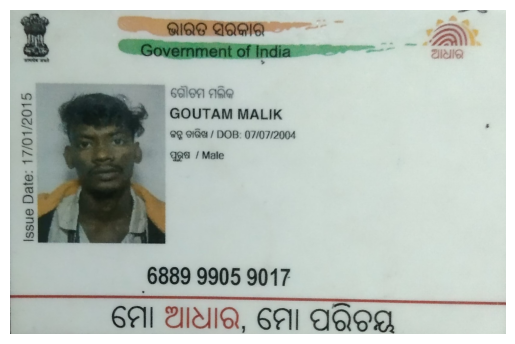

In [13]:
ExtractDetails('/content/GAUTAM ADHAR.jpg')